# 시각화

In [2]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

https://blog.qlik.com/third-pillar-of-mapping-data-to-visualizations-usage


- 도수분포표란?
- 분할된 구간과 데이터의  개수를 표로 정리한것

In [5]:
df = pd.read_csv('./csv_File/ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [7]:
# 50 명의 영어 점수 array
eng = df['english']

#  Series로 변환하여 describe를 표시 
eng.describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [9]:
freq , _ = np.histogram(eng,bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [11]:
# 0~10 ,10~20  ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
# freq_class를 인덱스로 DataFrame 생성
freq_dist_df = pd.DataFrame({'frequency':freq },
                           index= pd.Index(freq_class,name = 'class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


# 계급값
- 각 계급을 대표하는 값으로 계급의 중앙값이 이용
- 60~70 의 계급이면 계급값은 65점

In [15]:
class_value = [(i*(i+10))//2 for i in range(0,100,10)]
class_value

[0, 100, 300, 600, 1000, 1500, 2100, 2800, 3600, 4500]

# 상대 도수
- 전체 데이터에 대해서 해당 계급의 데이터가 어느정도 비율을 차지하고 있는지  나타냄


In [13]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

## 누적 상대도수
- 해당 계급 까지의 상대도수의 합
- 누적합 : np.cumsum()

In [14]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [17]:
# 도수 분포표 확장
freq_dist_df['class value'] = class_value
freq_dist_df['relative freq'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative freq,cumulative relative frequency
class,,,,
0~10,0,0,0.00,0.00
10~20,0,100,0.00,0.00
20~30,0,300,0.00,0.00
30~40,2,600,0.04,0.04
40~50,8,1000,0.16,0.20
50~60,16,1500,0.32,0.52
60~70,18,2100,0.36,0.88
70~80,6,2800,0.12,1.00
80~90,0,3600,0.00,1.00


# 도수분포표의 최빈값
- 최대가 되는 계급의 계급값 => 60~70 인 계급의 도수가 최대

판다스 데이터 프레임의 idxmax() idxmin()


In [18]:
import pandas as pd

dataframe = pd.DataFrame({'Attendance': {0: 60, 1: 100, 2: 80,3: 78,4: 95},
                        'Obtained Marks': {0: 90, 1: 75, 2: 82, 3: 64, 4: 45}})
dataframe


,Attendance,Obtained Marks
0,60,90
1,100,75
2,80,82
3,78,64
4,95,45


In [19]:
series = dataframe.idxmax()
series

Attendance        1
Obtained Marks    0
dtype: int64

In [20]:
series = dataframe.idxmin()
series

Attendance        0
Obtained Marks    4
dtype: int64

## 도수 분포표 최빈값
- 빈도가 높은 계급의 계급값 반환

In [22]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

2100

## 백분위수 및 사분위수 계산 

In [23]:
x = np.arange(1,12,1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [26]:
np.percentile(x,10)  # 백분위수 
np.quantile(x,0.1)   # 0~1 사이 -> 사분위수 

2.0

2.0

In [27]:
np.percentile(x,25)  # 25%
np.quantile(x,0.25)   # 하사 분위수 

3.5

3.5

# 히스토그램

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  3.,  3.,
         7.,  8.,  6., 10.,  5.,  2.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 <BarContainer object of 25 artists>)

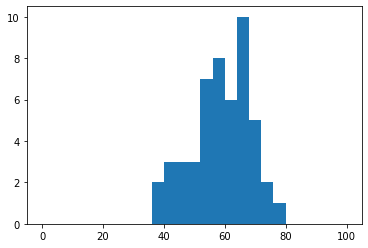

In [32]:
plt.hist(eng,bins = 25,range=(0,100))
plt.show()   # bins = 계급

(array([ 0.,  0.,  0.,  0.,  0.,  2.,  4.,  6., 14., 15.,  7.,  2.,  0.,
         0.,  0.]),
 array([  0.   ,   6.667,  13.333,  20.   ,  26.667,  33.333,  40.   ,
         46.667,  53.333,  60.   ,  66.667,  73.333,  80.   ,  86.667,
         93.333, 100.   ]),
 <BarContainer object of 15 artists>)

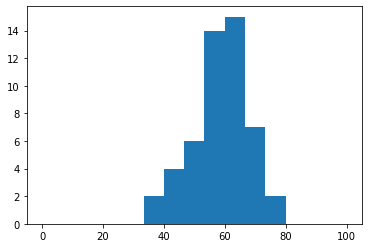

In [33]:
plt.hist(eng,bins = 15,range=(0,100))
plt.show()

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

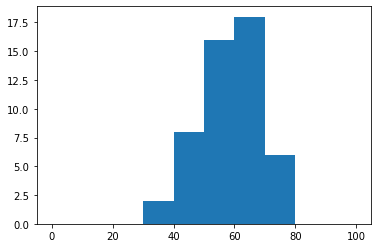

In [34]:
plt.hist(eng,bins = 10,range=(0,100))
plt.show()

## 상자그림

{'whiskers': [<matplotlib.lines.Line2D at 0x22a4816f0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22a4816f8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a48106280>],
 'medians': [<matplotlib.lines.Line2D at 0x22a4816fd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a48724c10>],
 'means': []}

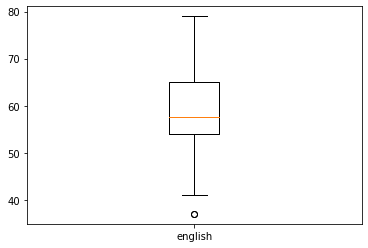

In [35]:
plt.boxplot(eng,labels= ['english'])
plt.show()

# 2차원 데이터 정리

***두데이터 사이의 관계를 나타내는 지표***

## 두변수 사이의 관계 측도
- 수치형 변수간의 관계 pearson's correlation
- 순서형 변수간의 관계  kendall's spearman correlation
- 범주형 변수간의 관계  카이제곱검정 - phi correlation

In [38]:
df = pd.read_csv('./csv_File/ch2_scores_em.csv',
                 index_col='student number')
df.head()


,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


Text(0.5, 0, 'english score')

Text(0, 0.5, 'mathematics score')

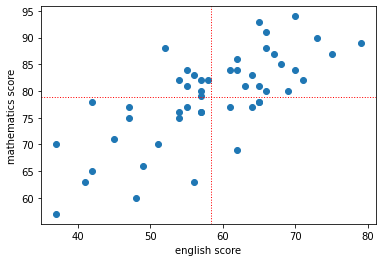

In [39]:
plt.scatter(df['english'], df['mathematics'])
plt.xlabel('english score')
plt.ylabel('mathematics score')

plt.axhline(y=df['mathematics'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.axvline(x=df['english'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.show()


## 공분산 

In [40]:
# 각 과목의 편차 및 과목간 공분산
summary_df = df.copy()
summary_df['eng_dev.'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['math_dev.'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['productOfDev.'] =\
    summary_df['eng_dev.'] * summary_df['math_dev.']
summary_df.head()


,english,mathematics,eng_dev.,math_dev.,productOfDev.
student number,,,,,
1,42,65,-16.38,-13.88,227.354
2,69,80,10.62,1.12,11.894
3,56,63,-2.38,-15.88,37.794
4,41,63,-17.38,-15.88,275.994
5,57,76,-1.38,-2.88,3.974


In [44]:
summary_df['productOfDev.'].mean()
# 각 항생별 영어와 수학의 공분산 평균의 58.4 이므로 영어와 수학은 양의 상관관계에 있다

58.486

### numpy 의 공분산 함수 cov
- 반환값 : 공분산 행렬
- 반환 행렬중 [0,1]과 [1,0]의 원소가 공분산인값

(영어,영어  영어,수학)


(수학,영어  수학,수학)

In [48]:
cov_mat = np.cov(df['english'],df['mathematics'],ddof = 0) # 모집단의 공분산
cov_mat

array([[94.116, 58.486],
       [58.486, 69.386]])

In [49]:
cov_mat[0,1] , cov_mat[1,0]

(58.4856, 58.4856)

In [50]:
cov_mat[0,0] # 영어과목의 분산

94.1156

In [51]:
cov_mat[1,1] # 수학 과목의 분산

69.3856

In [53]:
np.var(df['english'],ddof = 0)

94.116

## 상관계수
- 공분산은 단위의 제곱으로 표현되어 직관적으로이해하기 어려움
    - 시험점수간의 공분산 (점수x점수) , 키와 점수간의 공분산(cm x점수)
- 단위에 의존하지 않는 상관성을 나타내는 지표
- 상관계수는 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지않음

- 양의 상관은 1에 가까워지고 , 음의 상관은 -1에 가까워지고 무상관은 0

In [55]:
#  수식으로 상관계수 계산 
np.cov(df['english'], df['mathematics'], ddof=0)[0, 1] /\
    (np.std(df['english']) * np.std(df['mathematics']))


0.7237414863069244

### 상관계수 함수 np.corrcoef(x,y)  or df.corr(())

In [56]:
np.corrcoef(df['english'],df['mathematics'])

array([[1.   , 0.724],
       [0.724, 1.   ]])

In [58]:
# pd.DataFrame.corr() 형태 
df.corr()

,english,mathematics
english,1.000,0.724
mathematics,0.724,1.000


# 2차원 데이터 시각화
## 산점도

Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

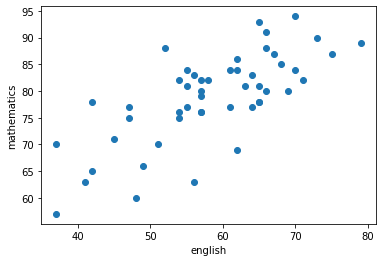

In [59]:
# 산점도
plt.scatter(df['english'],df['mathematics'] )
plt.xlabel('english')
plt.ylabel('mathematics')
plt.show()


## 회귀 직선

Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

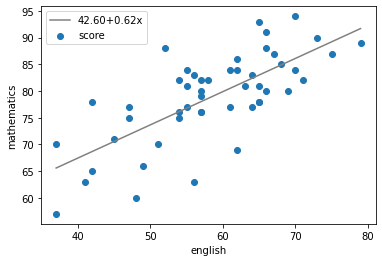

In [60]:
# 계수β_0와β_1를 구한다(기울기와 절편)
poly_fit = np.polyfit(df['english'],df['mathematics'], 1)

# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위한 x좌표
xs = np.linspace(df['english'].min(), df['english'].max())

# xs에 대응하는 y좌표
ys = poly_1d(xs)

plt.xlabel('english')
plt.ylabel('mathematics')
plt.scatter(df['english'],df['mathematics'], label='score')
plt.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
plt.legend(loc='upper left')

plt.show()


## 히트맵
- 히스토그램의 2차원 버전으로 색을 이용해 표현하는 그래프
- 영어 점수 35점부터 80점 , 수학점수 55점 부터 95점까지 5점 간격

Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

(array([35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.XTick at 0x22a493457f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.YTick at 0x22a493400d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

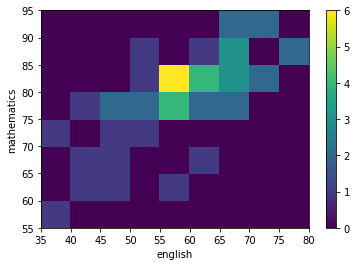

In [64]:
c = plt.hist2d(df['english'],df['mathematics'], bins = (9,8),range= [(35,80),(55,95)])
plt.xlabel('english')
plt.ylabel('mathematics')
plt.xticks()
plt.xticks(c[1])
plt.yticks(c[2])

plt.colorbar(c[3])
plt.show()

# 추론통계 
- 일부 데이터로부터전체의 통계적 성질을 추측

# 확률과 확률분포

## 표본의 추출방법 
- 무작위 추출 (임의추출) 임의로 표본 추출
- 복원 추출 여러차례 동일한 표몬선택
- 비복원 추출 한번만 사용하는 표본

In [65]:
df = pd.read_csv('./csv_File/ch4_scores400.csv')
scores = df['score']
scores[:10]


0    76
1    55
2    80
3    80
4    74
5    61
6    81
7    76
8    23
9    80
Name: score, dtype: int64

In [70]:
# 복원 추출 : 동일한 춧자 추출 될수 있음
np.random.choice([1,2,3],3)


array([1, 1, 3])

In [77]:
# 비복원 추출: 동일한 숫자 안나옴
np.random.choice([1,2,3],3,replace=False)

array([3, 1, 2])

In [83]:
np.random.seed(123)
np.random.choice([1,2,3],3)

array([3, 2, 3])

In [85]:
# scores 데이터에서 sample 추출
np.random.seed(0)
sample = np.random.choice(scores,20)
# 표본 평균 
sample.mean()

70.4

In [86]:
# 전체 데이터 평균
scores.mean()

69.530

In [89]:
for i in range(5):
    sample = np.random.choice(scores,20)
    print(f'{i+1} 번째 무작위 추출로 얻은 데이터의 표본평균 {sample.mean()}')

1 번째 무작위 추출로 얻은 데이터의 표본평균 69.15
2 번째 무작위 추출로 얻은 데이터의 표본평균 69.5
3 번째 무작위 추출로 얻은 데이터의 표본평균 71.35
4 번째 무작위 추출로 얻은 데이터의 표본평균 69.4
5 번째 무작위 추출로 얻은 데이터의 표본평균 71.5


In [91]:
# 불공정한 주사위의 확률분포를 구하는 실험
# 확률 분포에 필요한 변수가 취할 수 있는 값: dice
dice = [1,2,3,4,5,6]
# 그값이 나올수 있는 확률 : prob
prob=  [1/21,2/21,3/21,4/21,5/21,6/21]
prob

[0.048, 0.095, 0.143, 0.190, 0.238, 0.286]

In [92]:
np.random.choice(dice,p=prob)

5

In [99]:
num_trial = 100
sample = np.random.choice(dice,npm_t,p=prob)
sample

array([4, 4, 1, 3, 4, 6, 2, 6, 6, 4, 4, 3, 5, 1, 1, 4, 2, 3, 3, 3, 2, 1,
       2, 5, 6, 6, 4, 3, 5, 5, 6, 2, 6, 4, 3, 5, 3, 5, 5, 4, 5, 4, 5, 4,
       4, 6, 6, 1, 3, 4, 6, 6, 6, 6, 4, 6, 3, 2, 6, 3, 5, 2, 6, 6, 3, 4,
       4, 6, 3, 3, 4, 4, 6, 3, 5, 6, 5, 6, 6, 6, 5, 6, 6, 4, 2, 4, 3, 4,
       2, 5, 4, 6, 6, 5, 3, 5, 6, 4, 5, 3])

In [100]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
             'rel.freq':freq/num_trial},
            index=pd.Index(np.arange(1,7), name='dice'))


,frequency,rel.freq
dice,,
1,5,0.05
2,9,0.09
3,18,0.18
4,23,0.23
5,17,0.17
6,28,0.28


(array([0.05, 0.09, 0.18, 0.23, 0.17, 0.28]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

[Text(1.5, 0, '1'),
 Text(2.5, 0, '2'),
 Text(3.5, 0, '3'),
 Text(4.5, 0, '4'),
 Text(5.5, 0, '5'),
 Text(6.5, 0, '6')]

Text(0.5, 0, 'dice')

Text(0, 0.5, 'relative frequency')

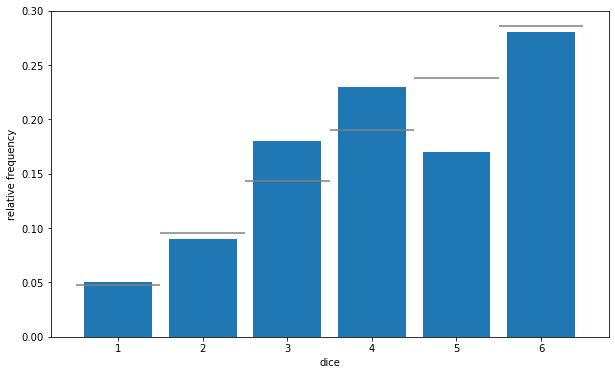

In [101]:
# 100번의 시도는 정해져있는 확률과는 차이가 있다
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()


***1000번 시도 : 실제 확률분포에 가까워짐***

(array([0.051, 0.096, 0.144, 0.192, 0.234, 0.284]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

Text(0.5, 0, 'dice')

Text(0, 0.5, 'relative frequency')

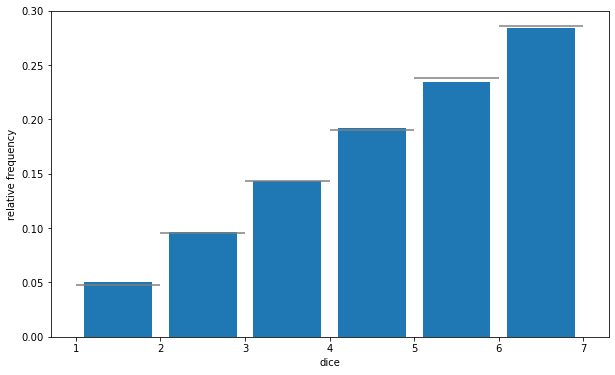

In [102]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# ax.set_xticks(np.linspace(1.5, 6.5, 6))
# ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()


시행 횟수를 늘리면 비슷해짐?

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.   ,
        0.   , 0.003, 0.003, 0.   , 0.003, 0.   , 0.   , 0.003, 0.   ,
        0.   , 0.   , 0.003, 0.   , 0.003, 0.005, 0.007, 0.007, 0.   ,
        0.013, 0.013, 0.007, 0.005, 0.015, 0.01 , 0.   , 0.022, 0.003,
        0.02 , 0.025, 0.02 , 0.025, 0.02 , 0.013, 0.015, 0.033, 0.015,
        0.035, 0.022, 0.02 , 0.015, 0.033, 0.04 , 0.028, 0.025, 0.018,
        0.022, 0.02 , 0.025, 0.018, 0.035, 0.025, 0.033, 0.025, 0.025,
        0.02 , 0.018, 0.022, 0.007, 0.015, 0.022, 0.013, 0.005, 0.007,
        0.013, 0.02 , 0.015, 0.01 , 0.007, 0.   , 0.013, 0.005, 0.003,
        0.013]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.

(20.000, 100.000)

(0.000, 0.042)

Text(0.5, 0, 'score')

Text(0, 0.5, 'relative frequency')

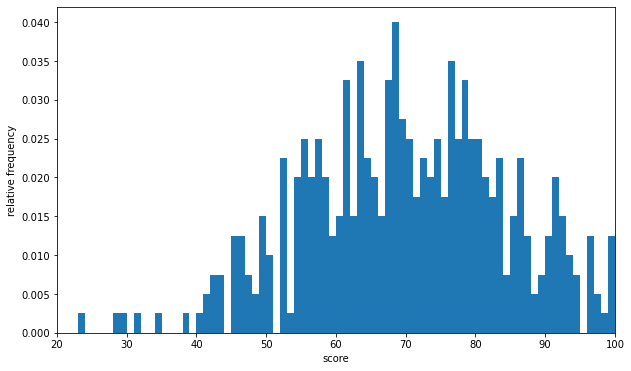

In [103]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()


## 표본 평균의 분포

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.   ,
        0.   , 0.003, 0.003, 0.   , 0.003, 0.   , 0.   , 0.003, 0.   ,
        0.   , 0.   , 0.003, 0.   , 0.003, 0.005, 0.007, 0.007, 0.   ,
        0.013, 0.013, 0.007, 0.005, 0.015, 0.01 , 0.   , 0.022, 0.003,
        0.02 , 0.025, 0.02 , 0.025, 0.02 , 0.013, 0.015, 0.033, 0.015,
        0.035, 0.022, 0.02 , 0.015, 0.033, 0.04 , 0.028, 0.025, 0.018,
        0.022, 0.02 , 0.025, 0.018, 0.035, 0.025, 0.033, 0.025, 0.025,
        0.02 , 0.018, 0.022, 0.007, 0.015, 0.022, 0.013, 0.005, 0.007,
        0.013, 0.02 , 0.015, 0.01 , 0.007, 0.   , 0.013, 0.005, 0.003,
        0.013]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.

(20.000, 100.000)

(0.000, 0.042)

Text(0.5, 0, 'score')

Text(0, 0.5, 'relative frequency')

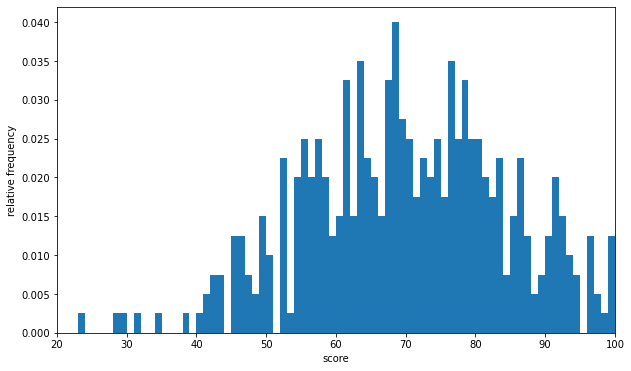

In [104]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()
